<a href="https://colab.research.google.com/github/SidharthBhakth/Time-Series-Forecasting-with-TF2.x/blob/master/4_Modeling_Long_Term_Dependency_with_LSTMs_in_TF2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modeling Long Term Dependency with LSTMs

Model a randomly generated dataset with 30 timesteps using RNNs and LSTMs to understand how LSTMs succeed in modeling long term dependency.

In [0]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# Create dataset
N = 5000 # number of samples
T = 30 # number of timesteps

X, y = [], []

def get_label(x, i1, i2, i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(N):
  x = np.random.randn(T)
  X.append(x)

  #yt = get_label(x, -1, -2, -3) # short distance
  yt = get_label(x, 0, 1, 2) # long distance
  y.append(yt)

X = np.array(X).reshape(-1, T, 1)
y = np.array(y)

X.shape, y.shape

((5000, 30, 1), (5000,))

### **Simple RNN**

In [3]:
# Build
i = Input(shape=(T, 1))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

# Compile
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train
r = model.fit(X, y, validation_split=0.5, epochs=200, verbose=2)

Epoch 1/200
79/79 - 1s - loss: 0.7080 - accuracy: 0.5124 - val_loss: 0.6978 - val_accuracy: 0.4872
Epoch 2/200
79/79 - 0s - loss: 0.6955 - accuracy: 0.5044 - val_loss: 0.6954 - val_accuracy: 0.4884
Epoch 3/200
79/79 - 0s - loss: 0.6943 - accuracy: 0.5108 - val_loss: 0.6999 - val_accuracy: 0.4832
Epoch 4/200
79/79 - 0s - loss: 0.6925 - accuracy: 0.5144 - val_loss: 0.6948 - val_accuracy: 0.5044
Epoch 5/200
79/79 - 0s - loss: 0.6930 - accuracy: 0.5204 - val_loss: 0.6940 - val_accuracy: 0.5112
Epoch 6/200
79/79 - 0s - loss: 0.6940 - accuracy: 0.5160 - val_loss: 0.6941 - val_accuracy: 0.5096
Epoch 7/200
79/79 - 0s - loss: 0.6932 - accuracy: 0.5136 - val_loss: 0.6972 - val_accuracy: 0.4884
Epoch 8/200
79/79 - 0s - loss: 0.6925 - accuracy: 0.5280 - val_loss: 0.6948 - val_accuracy: 0.5048
Epoch 9/200
79/79 - 0s - loss: 0.6922 - accuracy: 0.5116 - val_loss: 0.7000 - val_accuracy: 0.5080
Epoch 10/200
79/79 - 0s - loss: 0.6909 - accuracy: 0.5304 - val_loss: 0.7025 - val_accuracy: 0.4908
Epoch 11/

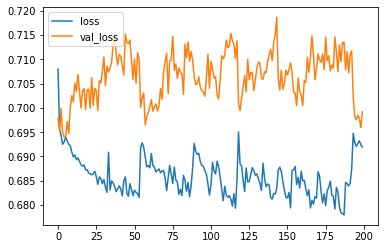

In [4]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

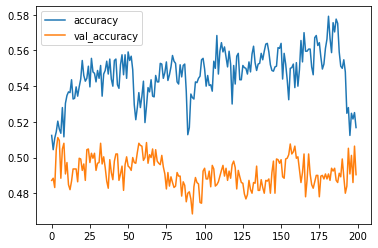

In [5]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### **LSTM**

In [6]:
# Build
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

# Compile
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train
r = model.fit(X, y, validation_split=0.5, epochs=200, verbose=2)

Epoch 1/200
79/79 - 1s - loss: 0.6959 - accuracy: 0.4968 - val_loss: 0.6967 - val_accuracy: 0.4884
Epoch 2/200
79/79 - 1s - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.4948
Epoch 3/200
79/79 - 1s - loss: 0.6930 - accuracy: 0.5288 - val_loss: 0.6961 - val_accuracy: 0.4884
Epoch 4/200
79/79 - 1s - loss: 0.6925 - accuracy: 0.5172 - val_loss: 0.6953 - val_accuracy: 0.4900
Epoch 5/200
79/79 - 1s - loss: 0.6922 - accuracy: 0.5252 - val_loss: 0.6997 - val_accuracy: 0.4772
Epoch 6/200
79/79 - 1s - loss: 0.6923 - accuracy: 0.5196 - val_loss: 0.6950 - val_accuracy: 0.4876
Epoch 7/200
79/79 - 1s - loss: 0.6926 - accuracy: 0.5248 - val_loss: 0.6952 - val_accuracy: 0.4836
Epoch 8/200
79/79 - 1s - loss: 0.6927 - accuracy: 0.5128 - val_loss: 0.6953 - val_accuracy: 0.4856
Epoch 9/200
79/79 - 1s - loss: 0.6922 - accuracy: 0.5228 - val_loss: 0.6952 - val_accuracy: 0.4892
Epoch 10/200
79/79 - 1s - loss: 0.6919 - accuracy: 0.5220 - val_loss: 0.6963 - val_accuracy: 0.4896
Epoch 11/

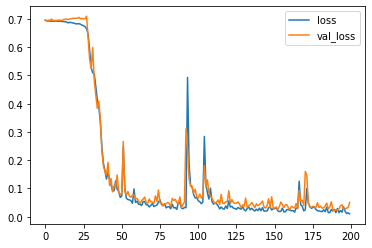

In [7]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

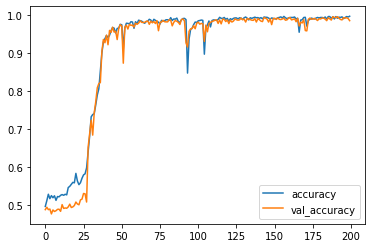

In [8]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### **LSTM with global maxpooling**

In [9]:
# Build
i = Input(shape=(T, 1))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

# Compile
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Train
r = model.fit(X, y, validation_split=0.5, epochs=200, verbose=2)

Epoch 1/200
79/79 - 1s - loss: 0.6935 - accuracy: 0.5268 - val_loss: 0.6866 - val_accuracy: 0.5492
Epoch 2/200
79/79 - 1s - loss: 0.6891 - accuracy: 0.5508 - val_loss: 0.6940 - val_accuracy: 0.5508
Epoch 3/200
79/79 - 1s - loss: 0.6724 - accuracy: 0.5956 - val_loss: 0.6585 - val_accuracy: 0.5892
Epoch 4/200
79/79 - 1s - loss: 0.6534 - accuracy: 0.6172 - val_loss: 0.6518 - val_accuracy: 0.6100
Epoch 5/200
79/79 - 1s - loss: 0.6525 - accuracy: 0.6260 - val_loss: 0.6471 - val_accuracy: 0.6192
Epoch 6/200
79/79 - 1s - loss: 0.6424 - accuracy: 0.6320 - val_loss: 0.6588 - val_accuracy: 0.5684
Epoch 7/200
79/79 - 1s - loss: 0.6372 - accuracy: 0.6436 - val_loss: 0.6337 - val_accuracy: 0.6268
Epoch 8/200
79/79 - 1s - loss: 0.6378 - accuracy: 0.6448 - val_loss: 0.6357 - val_accuracy: 0.6412
Epoch 9/200
79/79 - 1s - loss: 0.6204 - accuracy: 0.6608 - val_loss: 0.6116 - val_accuracy: 0.6460
Epoch 10/200
79/79 - 1s - loss: 0.6376 - accuracy: 0.6400 - val_loss: 0.6216 - val_accuracy: 0.6468
Epoch 11/

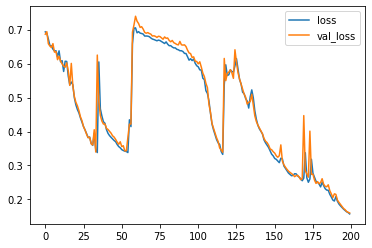

In [10]:
# Plot loss curve
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

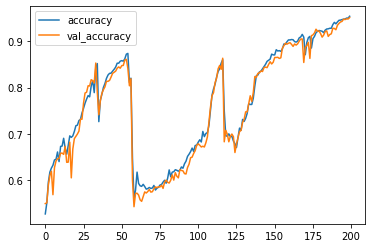

In [11]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()